In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
titanic = sns.load_dataset('titanic')

print("INITIAL EXPLORATION")

print(f"\nDataset Shape: {titanic.shape}")
print(f"\nFirst 5 rows:")
display(titanic.head())

print(f"\nDataset Info:")
titanic.info()

print(f"\nStatistical Summary:")
display(titanic.describe())

print(f"\nMissing Values:")
missing_data = titanic.isnull().sum()
display(missing_data[missing_data > 0])

INITIAL EXPLORATION

Dataset Shape: (891, 15)

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Statistical Summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values:


age            177
embarked         2
deck           688
embark_town      2
dtype: int64

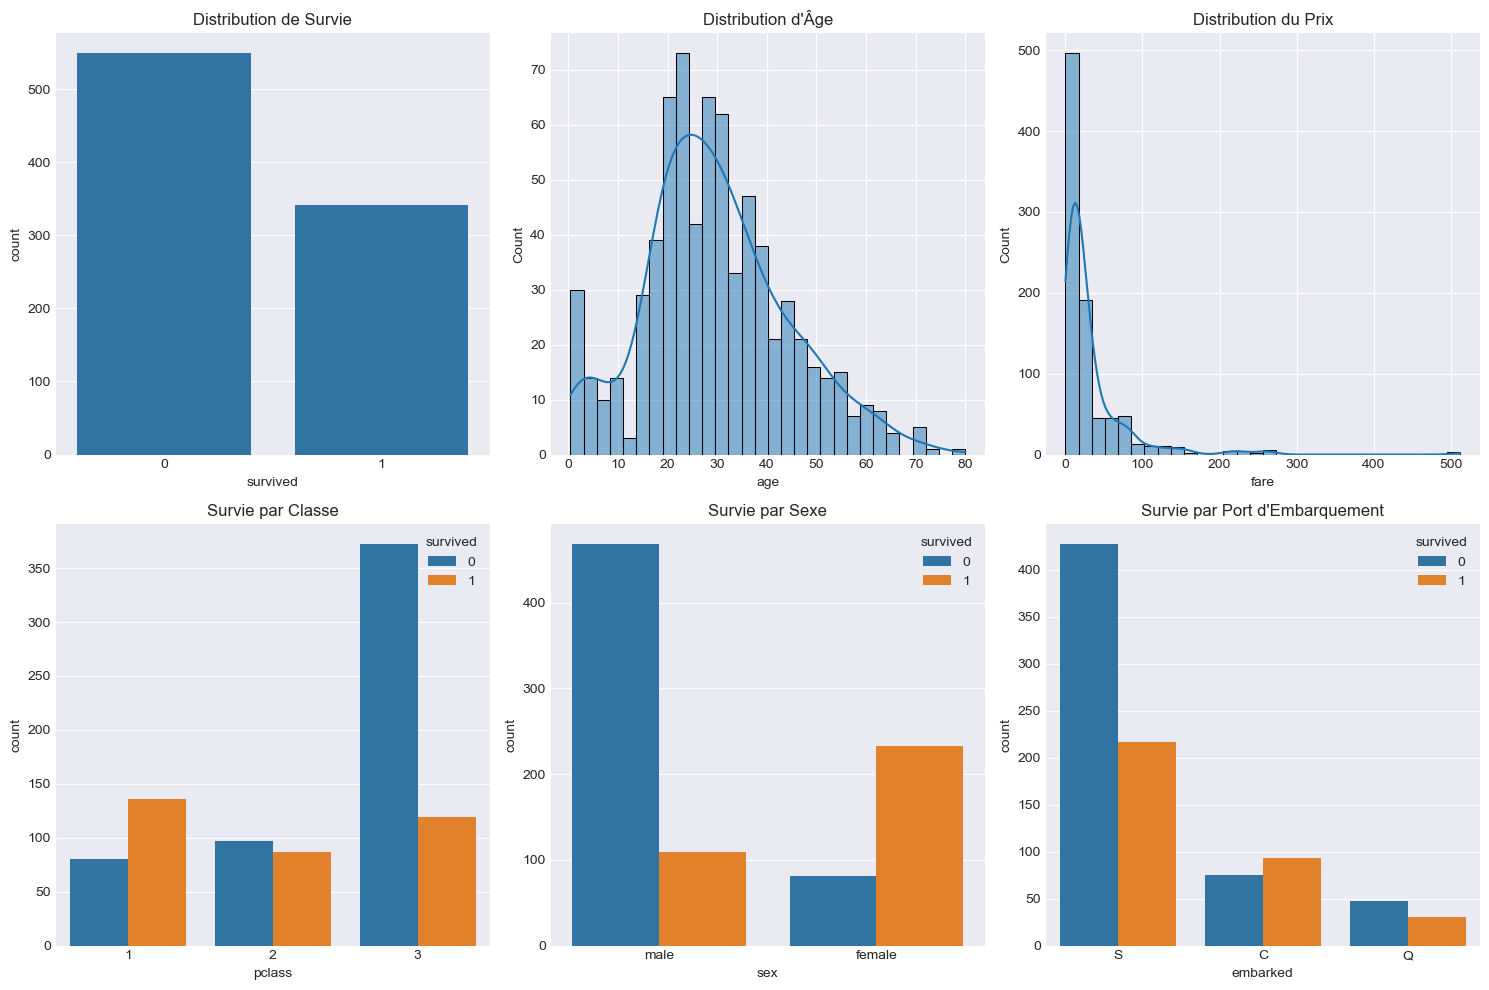

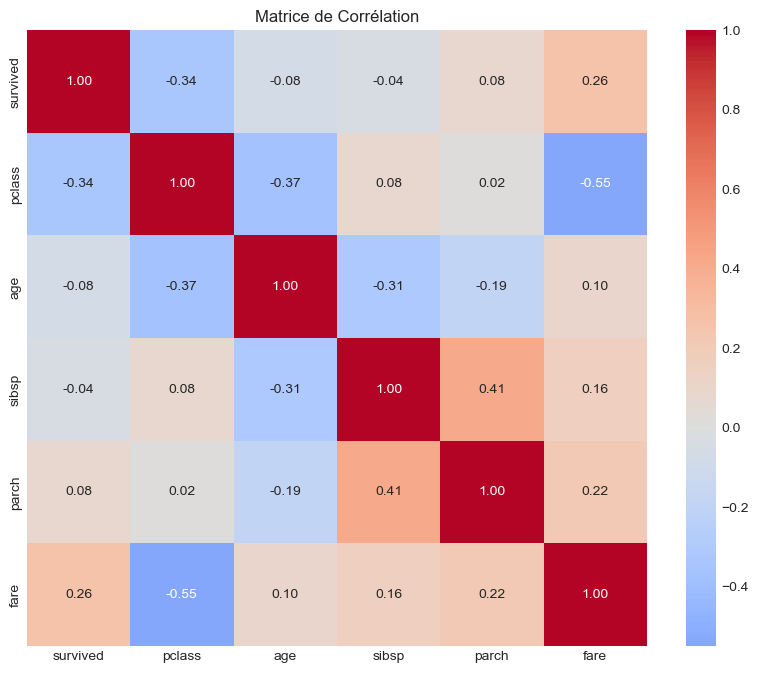

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x='survived', data=titanic, ax=axes[0, 0])
axes[0, 0].set_title('Distribution de Survie')

sns.histplot(titanic['age'].dropna(), kde=True, ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Distribution d\'Âge')

sns.histplot(titanic['fare'].dropna(), kde=True, ax=axes[0, 2], bins=30)
axes[0, 2].set_title('Distribution du Prix')

sns.countplot(x='pclass', hue='survived', data=titanic, ax=axes[1, 0])
axes[1, 0].set_title('Survie par Classe')

sns.countplot(x='sex', hue='survived', data=titanic, ax=axes[1, 1])
axes[1, 1].set_title('Survie par Sexe')

sns.countplot(x='embarked', hue='survived', data=titanic, ax=axes[1, 2])
axes[1, 2].set_title('Survie par Port d\'Embarquement')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
numeric_cols = titanic.select_dtypes(include=[np.number]).columns
corr_matrix = titanic[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

In [6]:
df = titanic.copy()

print("DATA CLEANING")

print(f"\nNombre de doublons: {df.duplicated().sum()}")

columns_to_drop = ['deck', 'embark_town', 'alive', 'who', 'adult_male']
df = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\nColonnes disponibles après suppression: {df.columns.tolist()}")

print("\nValeurs manquantes avant traitement:")
display(df.isnull().sum())

df['age'] = df.groupby(['pclass', 'sex'])['age'].transform(
    lambda x: x.fillna(x.median())
)

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df['fare'] = df.groupby('pclass')['fare'].transform(
    lambda x: x.fillna(x.median())
)

print("\nValeurs manquantes après traitement:")
display(df.isnull().sum())

DATA CLEANING

Nombre de doublons: 107

Colonnes disponibles après suppression: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'alone']

Valeurs manquantes avant traitement:


survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
alone         0
dtype: int64


Valeurs manquantes après traitement:


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
alone       0
dtype: int64

In [7]:
print("FEATURE ENGINEERING")
print("Colonnes disponibles:", df.columns.tolist())
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

if 'name' in df.columns:
    df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
else:
    print("Colonne 'name' non trouvée. Recherche d'une colonne de nom...")
    possible_name_cols = ['Name', 'NAME', 'nom', 'Nom', 'passenger_name']
    name_col_found = False
    for col in possible_name_cols:
        if col in df.columns:
            df['title'] = df[col].str.extract(' ([A-Za-z]+)\.', expand=False)
            name_col_found = True
            print(f"Colonne de nom trouvée: {col}")
            break
    
    if not name_col_found:
        print("Aucune colonne de nom trouvée. Création d'une colonne 'title' avec valeur par défaut.")
        df['title'] = 'Mr'  

title_counts = df['title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df['title'] = df['title'].replace(rare_titles, 'Rare')

df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 12, 18, 35, 60, 100], 
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

df['fare_group'] = pd.qcut(df['fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

if 'cabin' in df.columns:
    df['has_cabin'] = df['cabin'].notna().astype(int)
else:
    print("Colonne 'cabin' non trouvée. Création d'une colonne 'has_cabin' avec 0.")
    df['has_cabin'] = 0

columns_to_drop = []
if 'name' in df.columns:
    columns_to_drop.append('name')
if 'cabin' in df.columns:
    columns_to_drop.append('cabin')
    
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)

print("\nNouvelles caractéristiques créées:")
new_features = ['family_size', 'is_alone', 'title', 'age_group', 'fare_group', 'has_cabin']
for feature in new_features:
    if feature in df.columns:
        print(f"\n{feature}:")
        print(df[feature].value_counts().head())

print("\nShape du dataset après feature engineering:", df.shape)

FEATURE ENGINEERING
Colonnes disponibles: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'alone']
Colonne 'name' non trouvée. Recherche d'une colonne de nom...
Aucune colonne de nom trouvée. Création d'une colonne 'title' avec valeur par défaut.
Colonne 'cabin' non trouvée. Création d'une colonne 'has_cabin' avec 0.

Nouvelles caractéristiques créées:

family_size:
family_size
1    537
2    161
3    102
4     29
6     22
Name: count, dtype: int64

is_alone:
is_alone
1    537
0    354
Name: count, dtype: int64

title:
title
Mr    891
Name: count, dtype: int64

age_group:
age_group
Young Adult    514
Adult          216
Teen            70
Child           69
Senior          22
Name: count, dtype: int64

fare_group:
fare_group
Medium       224
Low          223
High         222
Very High    222
Name: count, dtype: int64

has_cabin:
has_cabin
0    891
Name: count, dtype: int64

Shape du dataset après feature engineering: (891, 16)


OUTLIER HANDLING
age: 33 outliers détectés
fare: 116 outliers détectés
sibsp: 46 outliers détectés
parch: 213 outliers détectés
family_size: 91 outliers détectés


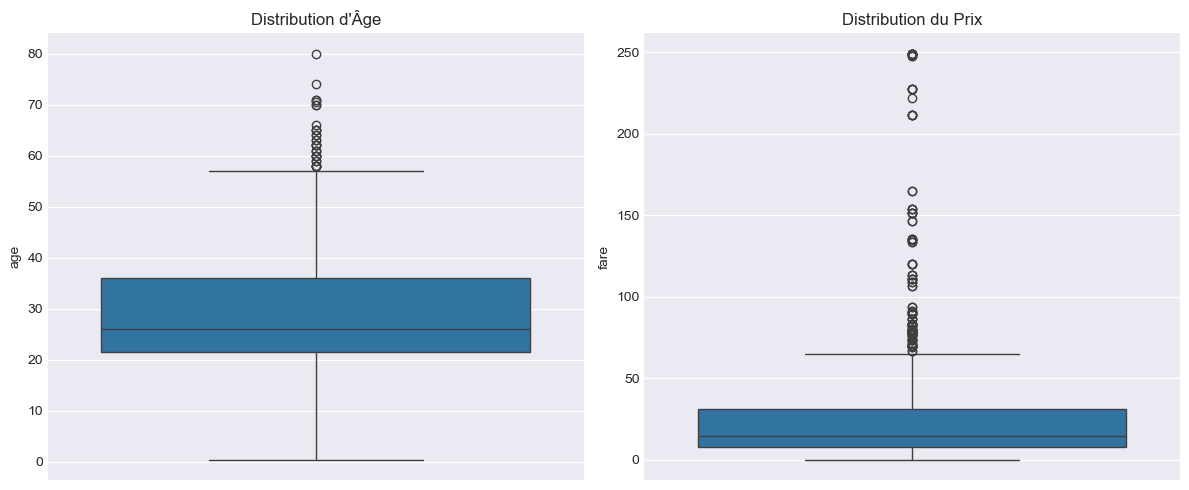

In [8]:
print("OUTLIER HANDLING")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'family_size']
for col in numerical_cols:
    if col in df.columns:
        outliers = detect_outliers_iqr(df, col)
        print(f"{col}: {len(outliers)} outliers détectés")

if 'fare' in df.columns:
    fare_99th = df['fare'].quantile(0.99)
    df['fare'] = np.where(df['fare'] > fare_99th, fare_99th, df['fare'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['age'], ax=axes[0])
axes[0].set_title('Distribution d\'Âge')
sns.boxplot(y=df['fare'], ax=axes[1])
axes[1].set_title('Distribution du Prix')
plt.tight_layout()
plt.show()

In [9]:

print("CATEGORICAL ENCODING")
df_encoded = df.copy()

binary_cols = ['sex', 'is_alone', 'has_cabin']
for col in binary_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

nominal_cols = ['embarked', 'title', 'age_group', 'fare_group']
for col in nominal_cols:
    if col in df_encoded.columns:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded = df_encoded.drop(columns=[col])

if 'survived' in df_encoded.columns:
    print(f"\nDataset après encodage - Shape: {df_encoded.shape}")
    print(f"Nombre de colonnes: {len(df_encoded.columns)}")
    print(f"Colonnes: {df_encoded.columns.tolist()}")
else:
    print("ERREUR: La colonne 'survived' a été perdue pendant l'encodage!")
    print("Colonnes disponibles:", df_encoded.columns.tolist())

CATEGORICAL ENCODING

Dataset après encodage - Shape: (891, 21)
Nombre de colonnes: 21
Colonnes: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'alone', 'family_size', 'is_alone', 'has_cabin', 'embarked_Q', 'embarked_S', 'age_group_Teen', 'age_group_Young Adult', 'age_group_Adult', 'age_group_Senior', 'fare_group_Medium', 'fare_group_High', 'fare_group_Very High']


In [10]:
print("FEATURE SCALING")

if 'survived' not in df_encoded.columns:
    print("ERREUR: La colonne 'survived' n'existe pas dans df_encoded")
    print("Arrêt du traitement.")
   
else:
    X = df_encoded.drop(columns=['survived'])
    y = df_encoded['survived']
    
    print(f"Shape de X: {X.shape}")
    print(f"Shape de y: {y.shape}")
    
   
    numerical_cols_for_scaling = ['age', 'fare', 'sibsp', 'parch', 'family_size']
    numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col in X.columns]
    
    print(f"Colonnes à mettre à l'échelle: {numerical_cols_for_scaling}")
    
    if numerical_cols_for_scaling:
        scaler = StandardScaler()
        X_scaled = X.copy()
        X_scaled[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])
        
        print("\nPremières lignes après StandardScaler:")
        display(X_scaled[numerical_cols_for_scaling].head())
    else:
        print("Aucune colonne numérique trouvée pour la mise à l'échelle.")
        X_scaled = X

FEATURE SCALING
Shape de X: (891, 20)
Shape de y: (891,)
Colonnes à mettre à l'échelle: ['age', 'fare', 'sibsp', 'parch', 'family_size']

Premières lignes après StandardScaler:


,age,fare,sibsp,parch,family_size
0,-0.534891,-0.564109,0.432793,-0.473674,0.059160
1,0.668392,0.942548,0.432793,-0.473674,0.059160
2,-0.234070,-0.548227,-0.474545,-0.473674,-0.560975
3,0.442776,0.514708,0.432793,-0.473674,0.059160
4,0.442776,-0.545285,-0.474545,-0.473674,-0.560975


In [2]:
print("TRAIN/TEST SPLIT")

if 'X_scaled' in locals() and 'y' in locals():
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")
    
    print(f"\nDistribution des classes dans l'ensemble d'entraînement:")
    print(y_train.value_counts(normalize=True))
    
    print(f"\nDistribution des classes dans l'ensemble de test:")
    print(y_test.value_counts(normalize=True))
else:
    print("ERREUR: X_scaled ou y n'existent pas. Vérifiez les étapes précédentes.")

TRAIN/TEST SPLIT
ERREUR: X_scaled ou y n'existent pas. Vérifiez les étapes précédentes.


In [13]:
print("DIAGNOSTIC DES DONNÉES AVANT MODÉLISATION")

print(f"\n1. Types de données dans X_train:")
print(X_train.dtypes.value_counts())

non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric_cols:
    print(f"\n2. Colonnes non-numériques trouvées: {non_numeric_cols}")
    print(f"\n3. Exemple de valeurs pour chaque colonne non-numérique:")
    for col in non_numeric_cols:
        print(f"\n   {col}:")
        print(f"   Type: {X_train[col].dtype}")
        print(f"   Valeurs uniques: {X_train[col].unique()[:5]}")  
        print(f"   Nombre de valeurs uniques: {X_train[col].nunique()}")
else:
    print("\n2. Aucune colonne non-numérique trouvée.")

print(f"\n4. Dimensions de X_train: {X_train.shape}")
print(f"   Dimensions de X_test: {X_test.shape}")

print(f"\n5. Premières lignes de X_train:")
print(X_train.head())

DIAGNOSTIC DES DONNÉES AVANT MODÉLISATION

1. Types de données dans X_train:
bool        10
float64      5
int64        4
category     1
Name: count, dtype: int64

2. Colonnes non-numériques trouvées: ['class']

3. Exemple de valeurs pour chaque colonne non-numérique:

   class:
   Type: category
   Valeurs uniques: ['Third', 'Second', 'First']
Categories (3, object): ['First', 'Second', 'Third']
   Nombre de valeurs uniques: 3

4. Dimensions de X_train: (712, 20)
   Dimensions de X_test: (179, 20)

5. Premières lignes de X_train:
     pclass  sex       age     sibsp     parch      fare   class  alone  \
692       3    1 -0.309276 -0.474545 -0.473674  0.594609   Third   True   
481       2    1  0.066750 -0.474545 -0.473674 -0.734696  Second   True   
527       1    1  0.818802 -0.474545 -0.473674  4.483607   First   True   
855       3    0 -0.835712 -0.474545  0.767630 -0.514697   Third  False   
801       2    0  0.141955  0.432793  0.767630 -0.117053  Second  False   

     family_

In [14]:
print("CORRECTION DES DONNÉES NON-NUMÉRIQUES")

X_train_corrected = X_train.copy()
X_test_corrected = X_test.copy()


all_non_numeric = X_train_corrected.select_dtypes(
    include=['object', 'category', 'bool']
).columns.tolist()

print(f"Colonnes non-numériques identifiées: {all_non_numeric}")


for col in all_non_numeric:
    print(f"\nTraitement de la colonne '{col}':")
    print(f"   Type: {X_train_corrected[col].dtype}")
    
  
    if X_train_corrected[col].dtype == 'bool':
        X_train_corrected[col] = X_train_corrected[col].astype(int)
        X_test_corrected[col] = X_test_corrected[col].astype(int)
        print(f"   Converti de bool à int")
    
    
    elif X_train_corrected[col].dtype.name == 'category':
        
        le = LabelEncoder()
      
        combined = pd.concat([X_train_corrected[col], X_test_corrected[col]])
        le.fit(combined)
        X_train_corrected[col] = le.transform(X_train_corrected[col])
        X_test_corrected[col] = le.transform(X_test_corrected[col])
        print(f"   Encodé avec LabelEncoder ({len(le.classes_)} classes)")
    
 
    elif X_train_corrected[col].dtype == 'object':
      
        try:
            X_train_corrected[col] = pd.to_numeric(X_train_corrected[col], errors='raise')
            X_test_corrected[col] = pd.to_numeric(X_test_corrected[col], errors='raise')
            print(f"   Converti en numérique")
        except:
            
            n_unique = X_train_corrected[col].nunique()
            if n_unique <= 10: 
                
                dummies_train = pd.get_dummies(X_train_corrected[col], prefix=col, drop_first=True)
                dummies_test = pd.get_dummies(X_test_corrected[col], prefix=col, drop_first=True)
                
                all_columns = list(set(dummies_train.columns) | set(dummies_test.columns))
                for col_name in all_columns:
                    if col_name not in dummies_train.columns:
                        dummies_train[col_name] = 0
                    if col_name not in dummies_test.columns:
                        dummies_test[col_name] = 0
                
                dummies_train = dummies_train[all_columns]
                dummies_test = dummies_test[all_columns]
                
                X_train_corrected = pd.concat([X_train_corrected, dummies_train], axis=1)
                X_test_corrected = pd.concat([X_test_corrected, dummies_test], axis=1)
                
                X_train_corrected = X_train_corrected.drop(columns=[col])
                X_test_corrected = X_test_corrected.drop(columns=[col])
                
                print(f"   Encodé avec OneHot ({n_unique} catégories)")
            else:
                le = LabelEncoder()
                combined = pd.concat([X_train_corrected[col], X_test_corrected[col]])
                le.fit(combined)
                X_train_corrected[col] = le.transform(X_train_corrected[col])
                X_test_corrected[col] = le.transform(X_test_corrected[col])
                print(f"   Encodé avec LabelEncoder ({n_unique} catégories)")

print(f"\nVérification finale:")
non_numeric_after = X_train_corrected.select_dtypes(
    include=['object', 'category', 'bool']
).columns.tolist()

if non_numeric_after:
    print(f"ATTENTION: Colonnes non-numériques restantes: {non_numeric_after}")
else:
    print(f"SUCCÈS: Toutes les colonnes sont maintenant numériques!")
    print(f"Nouvelles dimensions X_train: {X_train_corrected.shape}")
    print(f"Nouvelles dimensions X_test: {X_test_corrected.shape}")
    
    X_train = X_train_corrected
    X_test = X_test_corrected

print(f"\nTypes de données finaux dans X_train:")
print(X_train.dtypes.value_counts())

CORRECTION DES DONNÉES NON-NUMÉRIQUES
Colonnes non-numériques identifiées: ['class', 'alone', 'embarked_Q', 'embarked_S', 'age_group_Teen', 'age_group_Young Adult', 'age_group_Adult', 'age_group_Senior', 'fare_group_Medium', 'fare_group_High', 'fare_group_Very High']

Traitement de la colonne 'class':
   Type: category
   Encodé avec LabelEncoder (3 classes)

Traitement de la colonne 'alone':
   Type: bool
   Converti de bool à int

Traitement de la colonne 'embarked_Q':
   Type: bool
   Converti de bool à int

Traitement de la colonne 'embarked_S':
   Type: bool
   Converti de bool à int

Traitement de la colonne 'age_group_Teen':
   Type: bool
   Converti de bool à int

Traitement de la colonne 'age_group_Young Adult':
   Type: bool
   Converti de bool à int

Traitement de la colonne 'age_group_Adult':
   Type: bool
   Converti de bool à int

Traitement de la colonne 'age_group_Senior':
   Type: bool
   Converti de bool à int

Traitement de la colonne 'fare_group_Medium':
   Type: bo

LOGISTIC REGRESSION (après correction)
Types de données dans X_train: [dtype('int64') dtype('float64')]
Types de données dans X_test: [dtype('int64') dtype('float64')]

Valeurs NaN dans X_train: 0
Valeurs NaN dans X_test: 0

Accuracy: 0.8212

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



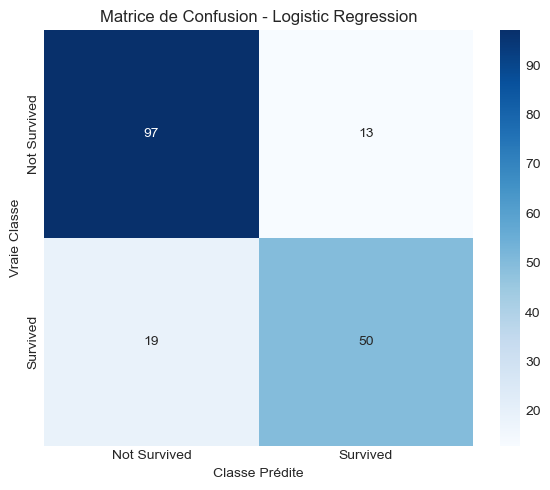

In [15]:
print("LOGISTIC REGRESSION (après correction)")

print(f"Types de données dans X_train: {X_train.dtypes.unique()}")
print(f"Types de données dans X_test: {X_test.dtypes.unique()}")


print(f"\nValeurs NaN dans X_train: {X_train.isnull().sum().sum()}")
print(f"Valeurs NaN dans X_test: {X_test.isnull().sum().sum()}")


lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAccuracy: {accuracy_lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Matrice de Confusion - Logistic Regression')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.tight_layout()
plt.show()

K-NEAREST NEIGHBORS
Accuracy: 0.7542

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       110
           1       0.69      0.65      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



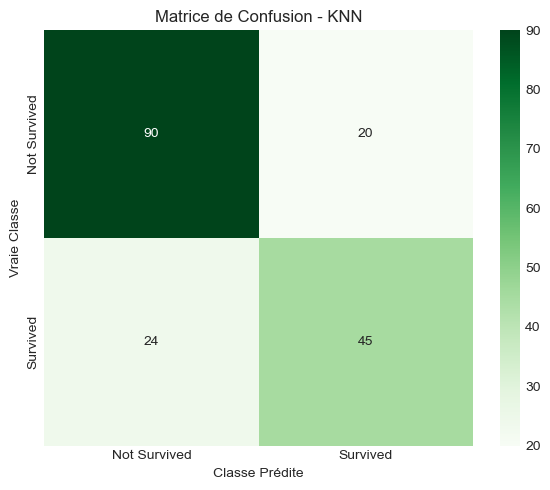

In [16]:
print("K-NEAREST NEIGHBORS")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Matrice de Confusion - KNN')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.tight_layout()
plt.show()

MODEL COMPARISON
Comparaison des performances:


,Model,Accuracy,Precision (Survived),Recall (Survived),F1-Score (Survived)
0,Logistic Regression,0.821229,0.793651,0.724638,0.757576
1,K-Nearest Neighbors,0.754190,0.692308,0.652174,0.671642


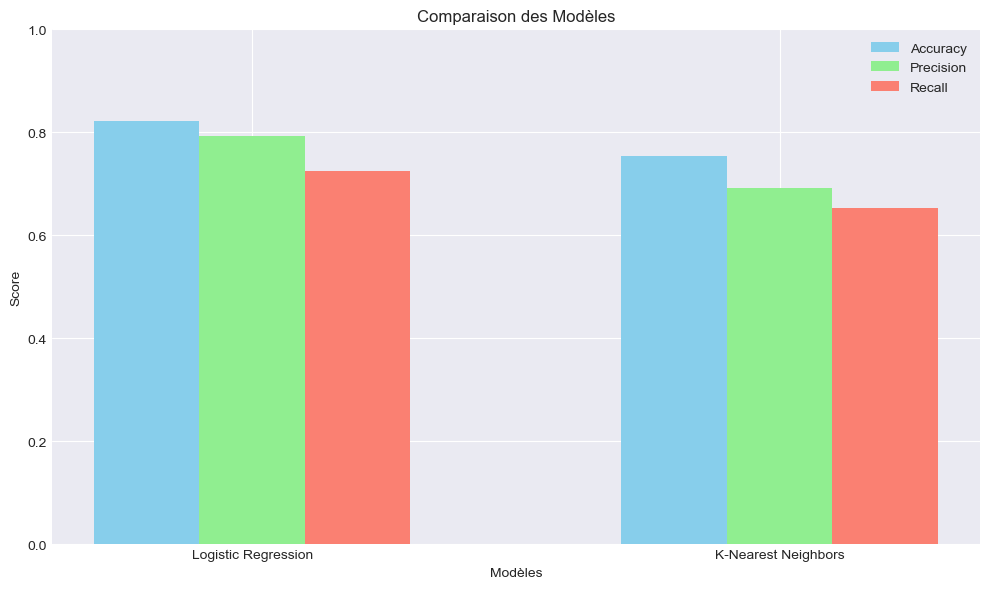

In [17]:
print("MODEL COMPARISON")

comparison_data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_lr, accuracy_knn],
}

report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

comparison_data['Precision (Survived)'] = [
    report_lr['1']['precision'],
    report_knn['1']['precision']
]
comparison_data['Recall (Survived)'] = [
    report_lr['1']['recall'],
    report_knn['1']['recall']
]
comparison_data['F1-Score (Survived)'] = [
    report_lr['1']['f1-score'],
    report_knn['1']['f1-score']
]

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("Comparaison des performances:")
display(comparison_df)

plt.figure(figsize=(10, 6))
x = np.arange(len(comparison_df))
width = 0.2

plt.bar(x - width, comparison_df['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x, comparison_df['Precision (Survived)'], width, label='Precision', color='lightgreen')
plt.bar(x + width, comparison_df['Recall (Survived)'], width, label='Recall', color='salmon')

plt.xlabel('Modèles')
plt.ylabel('Score')
plt.title('Comparaison des Modèles')
plt.xticks(x, comparison_df['Model'])
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

FEATURE IMPORTANCE

Top 10 des caractéristiques les plus importantes:


,Feature,Coefficient,Absolute_Value
1,sex,-2.519256,2.519256
13,age_group_Teen,-0.912452,0.912452
19,fare_group_Very High,0.665485,0.665485
14,age_group_Young Adult,-0.608231,0.608231
15,age_group_Adult,-0.565646,0.565646
2,age,-0.525658,0.525658
18,fare_group_High,0.523528,0.523528
6,class,-0.500700,0.500700
0,pclass,-0.495468,0.495468
3,sibsp,-0.383787,0.383787


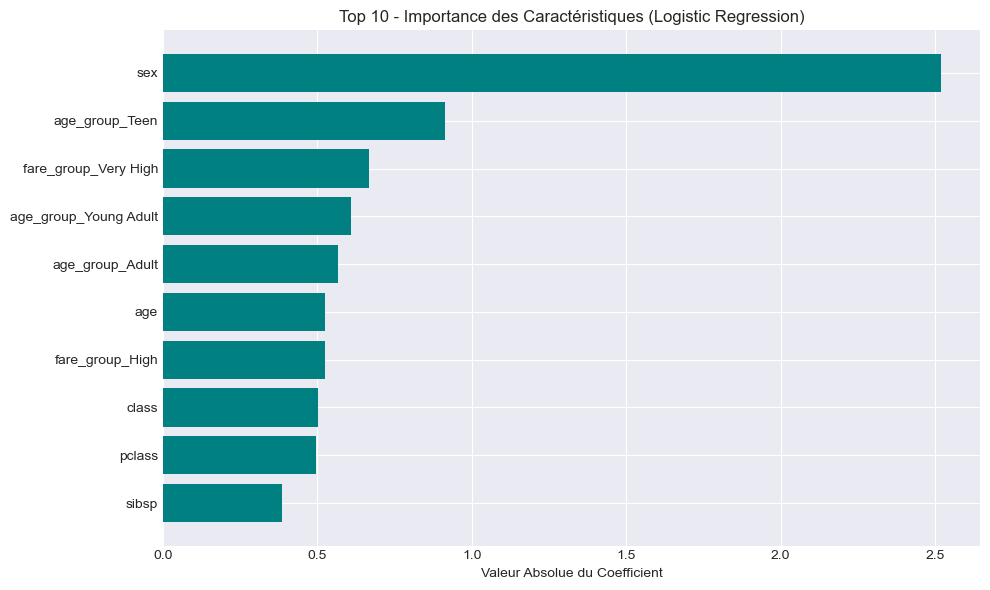

In [18]:
print("FEATURE IMPORTANCE")

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0],
    'Absolute_Value': abs(lr_model.coef_[0])
}).sort_values('Absolute_Value', ascending=False)

print("\nTop 10 des caractéristiques les plus importantes:")
display(feature_importance.head(10))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Absolute_Value'], color='teal')
plt.xlabel('Valeur Absolue du Coefficient')
plt.title('Top 10 - Importance des Caractéristiques (Logistic Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

EFFECT OF SCALING ON KNN (Version corrigée)
Shape de X_original: (891, 20)
Shape de y_original: (891,)

Types de données dans X_original:
bool        10
int64        7
float64      2
category     1
Name: count, dtype: int64

Colonnes non-numériques: ['class']

Valeurs NaN après conversion: 0
NaN dans X_train_raw: 0
NaN dans X_test_raw: 0

KNN Accuracy sans mise à l'échelle: 0.7039
KNN Accuracy avec mise à l'échelle: 0.7542
Différence: 0.0503

Conclusion: La mise à l'échelle améliore les performances de KNN.


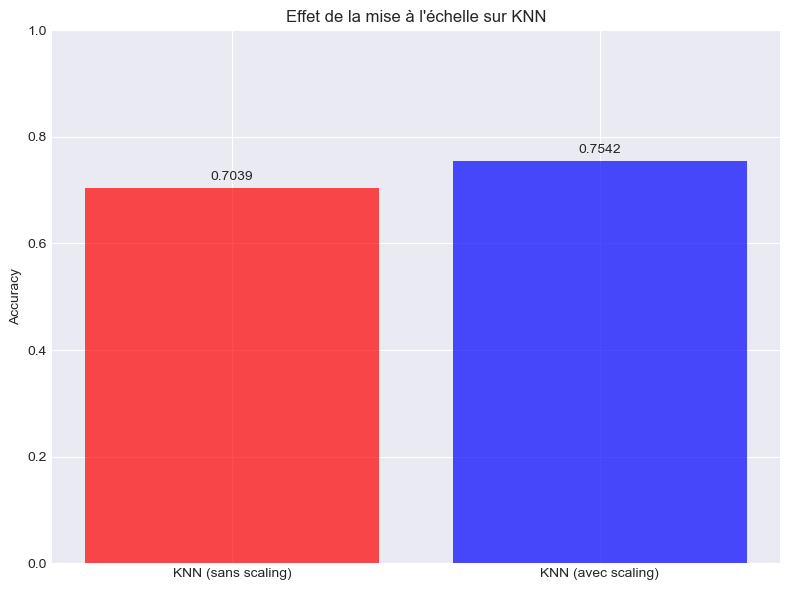

In [20]:
print("EFFECT OF SCALING ON KNN (Version corrigée)")

if 'df_encoded' in locals() and 'survived' in df_encoded.columns:
    X_original = df_encoded.drop(columns=['survived']).copy()
    y_original = df_encoded['survived'].copy()
    
    print(f"Shape de X_original: {X_original.shape}")
    print(f"Shape de y_original: {y_original.shape}")
    
    print(f"\nTypes de données dans X_original:")
    print(X_original.dtypes.value_counts())
    
    non_numeric_cols = X_original.select_dtypes(include=['object', 'category']).columns
    print(f"\nColonnes non-numériques: {list(non_numeric_cols)}")
    
    
    X_original_numeric = X_original.copy()
    
    for col in X_original_numeric.columns:
        if X_original_numeric[col].dtype in ['object', 'category']:
            le = LabelEncoder()
            if X_original_numeric[col].isnull().any():
                X_original_numeric[col] = X_original_numeric[col].fillna('Missing')
            X_original_numeric[col] = le.fit_transform(X_original_numeric[col])
        elif pd.api.types.is_numeric_dtype(X_original_numeric[col]):
            if X_original_numeric[col].isnull().any():
                median_val = X_original_numeric[col].median()
                X_original_numeric[col] = X_original_numeric[col].fillna(median_val)
    
    
    print(f"\nValeurs NaN après conversion: {X_original_numeric.isnull().sum().sum()}")
    
    
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
        X_original_numeric, y_original, test_size=0.2, random_state=42, stratify=y_original
    )
    
    
    print(f"NaN dans X_train_raw: {X_train_raw.isnull().sum().sum()}")
    print(f"NaN dans X_test_raw: {X_test_raw.isnull().sum().sum()}")
    
    
    knn_unscaled = KNeighborsClassifier(n_neighbors=5)
    knn_unscaled.fit(X_train_raw, y_train_raw)
    y_pred_unscaled = knn_unscaled.predict(X_test_raw)
    accuracy_unscaled = accuracy_score(y_test_raw, y_pred_unscaled)
    
    print(f"\nKNN Accuracy sans mise à l'échelle: {accuracy_unscaled:.4f}")
    
    
    if 'accuracy_knn' in locals():
        print(f"KNN Accuracy avec mise à l'échelle: {accuracy_knn:.4f}")
        improvement = accuracy_knn - accuracy_unscaled
        print(f"Différence: {improvement:.4f}")
        
        if improvement > 0:
            print("\nConclusion: La mise à l'échelle améliore les performances de KNN.")
        elif improvement < 0:
            print("\nConclusion: La mise à l'échelle réduit les performances de KNN.")
        else:
            print("\nConclusion: La mise à l'échelle n'a pas d'effet sur KNN.")
    else:
        print("\nNote: accuracy_knn n'est pas disponible pour comparaison.")
    
    
    if 'accuracy_knn' in locals():
        fig, ax = plt.subplots(figsize=(8, 6))
        models = ['KNN (sans scaling)', 'KNN (avec scaling)']
        accuracies = [accuracy_unscaled, accuracy_knn]
        
        bars = ax.bar(models, accuracies, color=['red', 'blue'], alpha=0.7)
        ax.set_ylabel('Accuracy')
        ax.set_title('Effet de la mise à l\'échelle sur KNN')
        ax.set_ylim(0, 1)
        
        
        for bar, acc in zip(bars, accuracies):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{acc:.4f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
else:
    print("Les données originales ne sont pas disponibles.")
    print("Solution alternative: Utiliser les données déjà préparées...")
    
   
    if 'X' in locals() and 'y' in locals():
        print("\nUtilisation des données X et y existantes...")
        
        
        X_numeric = X.copy()
        for col in X_numeric.columns:
            if X_numeric[col].isnull().any():
                median_val = X_numeric[col].median()
                X_numeric[col] = X_numeric[col].fillna(median_val)
        
        
        X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
            X_numeric, y, test_size=0.2, random_state=42, stratify=y
        )
        
        knn_unscaled = KNeighborsClassifier(n_neighbors=5)
        knn_unscaled.fit(X_train_raw, y_train_raw)
        y_pred_unscaled = knn_unscaled.predict(X_test_raw)
        accuracy_unscaled = accuracy_score(y_test_raw, y_pred_unscaled)
        
        print(f"KNN Accuracy sans mise à l'échelle: {accuracy_unscaled:.4f}")
        
        if 'accuracy_knn' in locals():
            print(f"KNN Accuracy avec mise à l'échelle: {accuracy_knn:.4f}")
            
            # Visualisation
            fig, ax = plt.subplots(figsize=(8, 6))
            models = ['KNN (sans scaling)', 'KNN (avec scaling)']
            accuracies = [accuracy_unscaled, accuracy_knn]
            
            bars = ax.bar(models, accuracies, color=['red', 'blue'], alpha=0.7)
            ax.set_ylabel('Accuracy')
            ax.set_title('Effet de la mise à l\'échelle sur KNN')
            ax.set_ylim(0, 1)
            
            for bar, acc in zip(bars, accuracies):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{acc:.4f}', ha='center', va='bottom')
            
            plt.tight_layout()
            plt.show()
    else:
        print("Les données X et y ne sont pas disponibles non plus.")

In [21]:

print("COMPLETE PIPELINE FUNCTION")


def titanic_pipeline_simple(test_size=0.2, random_state=42):
   
    df = sns.load_dataset('titanic')
    
    df = df.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], errors='ignore')
    
    df['age'] = df['age'].fillna(df['age'].median())
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
    df['fare'] = df['fare'].fillna(df['fare'].median())
    
    df['family_size'] = df['sibsp'] + df['parch'] + 1
    df['is_alone'] = (df['family_size'] == 1).astype(int)
    
    le = LabelEncoder()
    df['sex'] = le.fit_transform(df['sex'])
    df['embarked'] = le.fit_transform(df['embarked'].astype(str))
    
    df = df.select_dtypes(include=[np.number])
    
    if 'survived' not in df.columns:
        print("Erreur: 'survived' non trouvé")
        return None
    
    X = df.drop(columns=['survived'])
    y = df['survived']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lr = LogisticRegression(max_iter=500, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=5)
    
    lr.fit(X_train_scaled, y_train)
    knn.fit(X_train_scaled, y_train)
    
    lr_pred = lr.predict(X_test_scaled)
    knn_pred = knn.predict(X_test_scaled)
    
    results = {
        'Logistic Regression': accuracy_score(y_test, lr_pred),
        'K-Nearest Neighbors': accuracy_score(y_test, knn_pred)
    }
    
    return results

print("Test du pipeline simplifié")
results = titanic_pipeline_simple()
if results:
    print("\nRésultats:")
    for model, acc in results.items():
        print(f"  {model}: {acc:.4f}")

COMPLETE PIPELINE FUNCTION
Test du pipeline simplifié...

Résultats:
  Logistic Regression: 0.8101
  K-Nearest Neighbors: 0.8101
